# **Python Libraries**

In [1]:
!pip install wordcloud
!pip install textblob
!pip install transformers
!pip install torch
!pip install spacy
!pip install sklearn
!pip install pandas
!python -m spacy download en_core_web_sm

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import seaborn as sns
import torch
import spacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora, models
from IPython.display import FileLink
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from tqdm.notebook import tqdm
from transformers import BertForSequenceClassification, BertTokenizer, pipeline
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Loading Data Using Pandas DataFrame**

In [4]:
# Loading Data Using Pandas DataFrame
df1 = pd.read_csv('data_1.csv')
df2 = pd.read_csv('data_2.csv')
df3 = pd.read_csv('data_3.csv')
df4 = pd.read_csv('data_4.csv')
df5 = pd.read_csv('data_5.csv')
df6 = pd.read_csv('data_6.csv')
df7 = pd.read_csv('data_7.csv')
df8 = pd.read_csv('data_8.csv')
df9 = pd.read_csv('data_9.csv')
df10 = pd.read_csv('data_10.csv')
df11 = pd.read_csv('data_11.csv')
df12 = pd.read_csv('data_12.csv')
df13 = pd.read_csv('data_13.csv', names=['text'])

# Assuming df4 is the only DataFrame that needs renaming of 'full_text' column to 'text'
df4.rename(columns={'full_text': 'text'}, inplace=True)

# Vertical merge (stacking rows)
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13], ignore_index=True)

In [5]:
# Shuffle the rows of the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head()

,text
0,A 7 years old Pakistani boy fighting for his l...
1,Absolutely blown away by the strides Pakistan'...
2,"Allaha ji\nMake Hooria , Momina &amp; Anum to..."
3,Education and healthcare are top priorities fo...
4,"Dr Ayesha Mian, CEO &amp; Founder @SynapsePK, ..."


# **Data Preprocessing**

In [7]:
df.to_csv('tweets.csv', index=False)

In [8]:
from IPython.display import FileLink

# Save the preprocessed DataFrame to a CSV file
df.to_csv('tweets.csv', index=False)

# Create a hyperlink for downloading the CSV file
FileLink('tweets.csv')

/content/tweets.csv

## **Removing duplicate Tweets**

In [9]:
# Check the number of duplicates before removing them
duplicates = df.duplicated(subset='text').sum()
print(f"Number of duplicate tweets: {duplicates}")

# Data Deduplication: Removing duplicate tweets based on the text content
df.drop_duplicates(subset='text', inplace=True)

# Save the deduplicated DataFrame to a CSV file
df.to_csv('tweets.csv', index=False)

# Print the number of tweets before and after deduplication for reference
total_tweets = len(df1) + len(df2) + len(df3) + len(df4) + len(df5) + len(df6) + len(df7) + len(df8) + len(df9) + len(df10) + len(df11) + len(df12) + len(df13)
print(f"Number of tweets before deduplication: {total_tweets}")
print(f"Number of tweets after deduplication: {len(df)}")

Number of duplicate tweets: 1367
Number of tweets before deduplication: 3870
Number of tweets after deduplication: 2503


In [10]:
# Display the deduplicated DataFrame
df.head(10)

,text
0,A 7 years old Pakistani boy fighting for his l...
1,Absolutely blown away by the strides Pakistan'...
2,"Allaha ji\nMake Hooria , Momina &amp; Anum to..."
3,Education and healthcare are top priorities fo...
4,"Dr Ayesha Mian, CEO &amp; Founder @SynapsePK, ..."
5,Concerned about the rampant corruption plaguin...
6,"As per Pakistani senior journalist source, for..."
7,"""Telemedicine has the potential to revolutioni..."
8,The Sehat Sahulat Programme by KPK Government ...
9,Thrilled to see advancements in healthcare res...


In [11]:
# Read the merged CSV file into a DataFrame
df = pd.read_csv('tweets.csv')

In [12]:
from IPython.display import FileLink

# Save the preprocessed DataFrame to a CSV file
df.to_csv('tweets.csv', index=False)

# Create a hyperlink for downloading the CSV file
FileLink('tweets.csv')

/content/tweets.csv

In [13]:
len(df)

2503

In [ ]:
print(df.shape)

(2503, 1)


In [ ]:
# Select a random sample of tweets
sample_tweets = df['text'].sample(n=5)  # Adjust 'n' to select desired number of tweets

# Print the sample tweets
for i, tweet in enumerate(sample_tweets):
    print(f"Tweet {i+1}: {tweet}\n\n")

Tweet 1: "Grateful for the generosity of donors who support #HealthcareInitiatives and make a positive impact on the lives of others. Your kindness knows no bounds! ?? @v"


Tweet 2: Frustrated by the shortage of essential medications in pharmacies across #Pakistan. Every patient deserves timely access to life-saving treatments! ??? #MedicationShortage


Tweet 3: Dr Shahzad Baig, the national coordinator of the Pakistan Polio Eradication Programme, has been included in the list of 100 world leaders in the field of health by Time magazine, bringing an honour for the healthcare community in he South Asian nation. https://t.co/Tp9omxMoNI


Tweet 4: More on “Lies, Lies and more Lies #Afghanistan”. #Woman in Pakistan wearing a Pakistani plush blanket and in a Pakistani hospital claims she’s in AFG and the #Taliban came to her house questioning her for a male nurse touching her. Your lies hurt the truth and the cause. https://t.co/2zMgRH6aKN


Tweet 5: More than 40,000 Pakistani doctors are 

In [ ]:
example1 = df['text'][50]
print(example1)

Strengthening public-private partnerships can leverage resources and expertise to address complex health challenges and improve healthcare delivery in Pakistan. #PublicPrivatePartnerships #HealthChallenges #Pakistan


In [ ]:
example2 = df['text'][20]
print(example2)

A guide to Nutritional deficiencies 

Rafi Clinics
Primary Healthcare Clinic 
OPD Services only
Ph: 051-8465783
Email: raficlinics@gmail.com
Address: F-805, Holy Family Road, Satellite Town, Rawalpindi,  Pakistan.

#MedTwitter #Clinic #Rawalpindi #Food https://t.co/EuUUrfmsq7


In [ ]:
example3 = df['text'][300]
print(example3)

Shame , Pakistani doctors are as good as a lawyer saving you in Saharah desert , they get what they deserve, they should save lives instead of treating them as "experiments" or people k**ing them is totally justified on all scales of justice


In [ ]:
example4 = df['text'][304]
print(example4)

Pakistani media industry has given every third program to a MBBS doctor because of cultural respect towards a specific profession and this is the result. It's like asking a carpenter to fly a plane.

Respect @shoaib100mph. 🙏🏼


# **Exploratory Data Analysis (EDA)**

## **Distribution of Tweet Lengths**

**Computing the distribution of tweet lengths based on the number of characters in each tweet.**

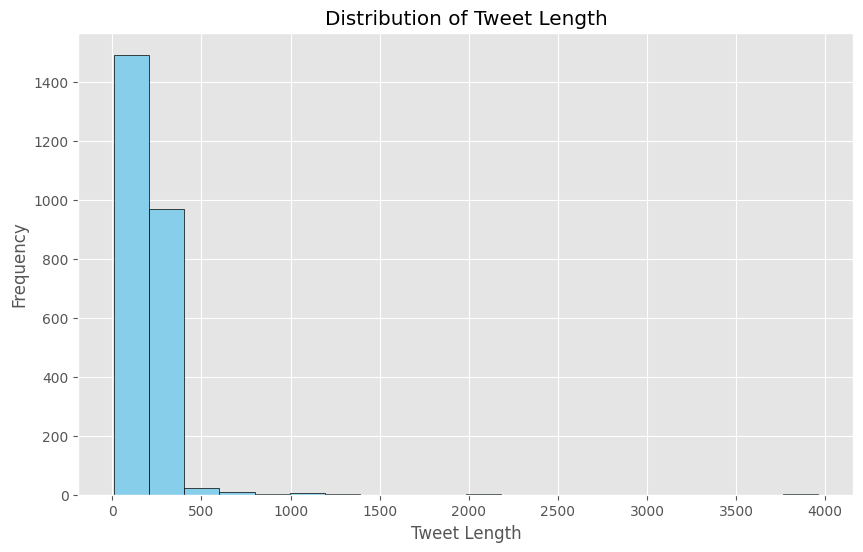

In [ ]:
# Distribution of Tweet Lengths
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['tweet_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Length')
plt.grid(True)
plt.show()

## **Distribution of Hashtags in Healthcare Tweets**

In [ ]:
# Hashtag Frequency Distribution
df['hashtags'] = df['text'].apply(lambda x: [word for word in x.split() if word.startswith('#')])
all_hashtags = [hashtag for sublist in df['hashtags'] for hashtag in sublist]
hashtag_freq = pd.Series(all_hashtags).value_counts().head(10)

<ipython-input-19-e6be3b0c9180>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_freq.values, y=hashtag_freq.index, palette='viridis')


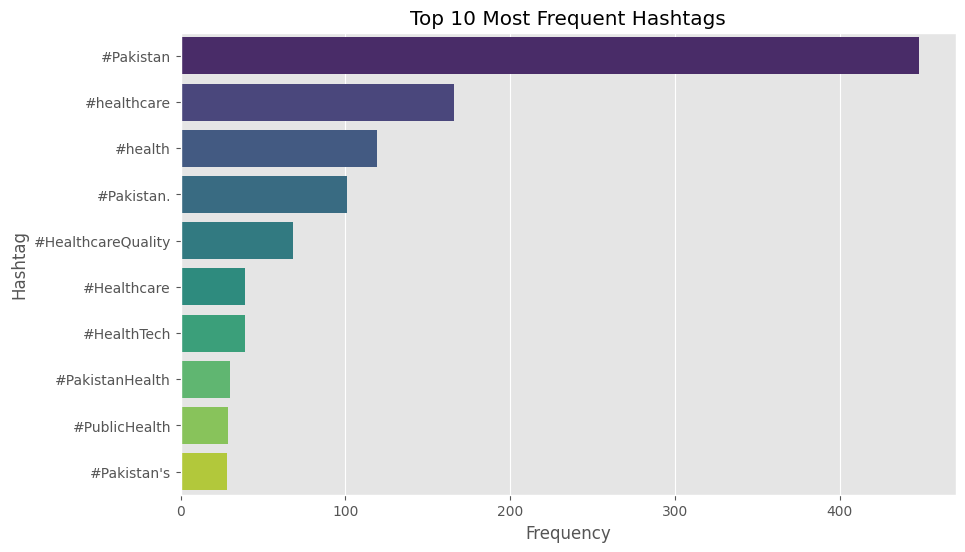

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtag_freq.values, y=hashtag_freq.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.title('Top 10 Most Frequent Hashtags')
plt.show()

# **Preprocessing Healthcare Tweets Dataset (Data Cleaning)**

In [14]:
# Read the CSV file into a DataFrame
df = pd.read_csv('tweets.csv')

# Data Cleaning: Remove any irrelevant characters, punctuation, or special symbols
df['text'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# Remove hashtags
df['text'] = df['text'].apply(lambda x: re.sub(r'#\w+', '', x))

# Remove mentions
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x))

# Lowercasing: Convert all text to lowercase to ensure consistency
df['text'] = df['text'].apply(lambda x: x.lower())

# Stopword Removal: Remove common stopwords (e.g., "and", "the") that do not contribute much to sentiment analysis
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatization: Reduce words to their base or root form to normalize variations
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Save the preprocessed DataFrame to a CSV file
df.to_csv('preprocessed_dataset.csv', index=False)

In [15]:
# Save the preprocessed DataFrame to a CSV file
df.to_csv('preprocessed_dataset.csv', index=False)

# Create a hyperlink for downloading the CSV file
FileLink('preprocessed_dataset.csv')

/content/preprocessed_dataset.csv

In [ ]:
df = pd.read_csv('preprocessed_dataset.csv')
df.head()

,text
0,proud moment division forensic psychiatry cpdf...
1,lawlessness fascism pakistan limit despite cou...
2,empathy compassion essential quality healthcar...
3,dr henry heimlich inventor antichoking heimlic...
4,inspired dedication healthcare professional wo...


In [ ]:
df.shape

(2503, 1)

## **Filtering Tweets Based on Keywords**

In [ ]:
# Function to filter tweets based on keywords
def filter_related_tweets(text, keywords):
    pattern = re.compile('|'.join(keywords), re.IGNORECASE)
    return bool(pattern.search(text))

# List of keywords related to healthcare in Pakistan
keywords = [
    'healthcare', 'hospital', 'doctor', 'nurse', 'medical', 'clinic', 'treatment',
    'medicine', 'health', 'disease', 'patient', 'surgery', 'pharmacy', 'emergency',
    'mental health', 'public health', 'health policy', 'health system', 'healthcare in pakistan', 'medical'
]

# Apply the filter function to the DataFrame
df['related'] = df['text'].apply(lambda x: filter_related_tweets(x, keywords))

# Filter the DataFrame to include only related tweets
related_df = df[df['related']]

# Save the filtered DataFrame
related_df.to_csv('filtered_healthcare_tweets.csv', index=False)

# Display the filtered DataFrame
related_df.head()

,text,related
0,pakistan pmlns leadership cusp new dawn ready ...,True
1,shocking incident happened pims hospital clerk...,True
2,letter suspension program say program executed...,True
4,thrilled see digitalhealthtechpks new mobile a...,True
5,imran khan allowed mdical test indpendant hosp...,True


## **Word Cloud of Filtered Tweets**

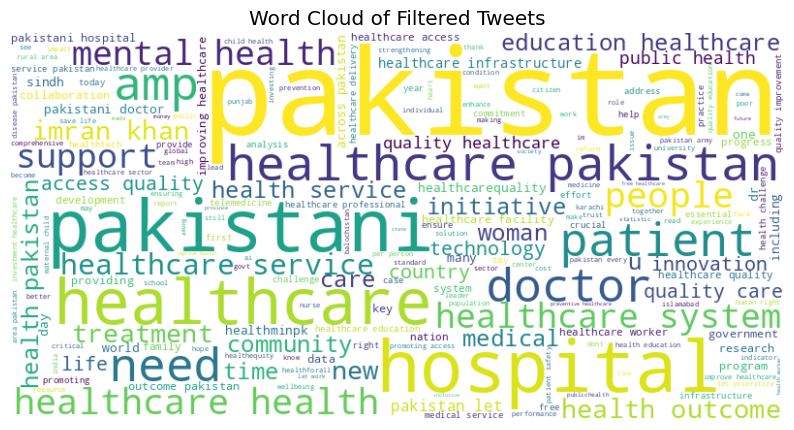

In [ ]:
# Word Cloud
all_words = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Tweets')
plt.show()

## **Basic Statistics**

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Basic Statistics
num_tweets = len(df)
avg_tweet_length = df['text'].apply(len).mean()

print("Basic Statistics")
print("Number of tweets:", num_tweets)
print("Average tweet length:", avg_tweet_length)

Basic Statistics
Number of tweets: 2503
Average tweet length: 161.6763883339992


## **Word Frequency Analysis with Tokenization**

In [ ]:
# Tokenize the words in each tweet and flatten the list
all_words = [word for tweet in df['text'] for word in tweet.split()]

# Calculate the frequency distribution of words
fdist = FreqDist(all_words)

# Display the top 10 most common words based on frequcy
print("\nTop 10 Most Common Words:")
print(fdist.most_common(10))


Top 10 Most Common Words:
[('pakistan', 2075), ('healthcare', 1697), ('health', 911), ('pakistani', 390), ('hospital', 363), ('access', 339), ('service', 324), ('quality', 323), ('care', 289), ('patient', 271)]


### **Plotting Top 10 most common words**

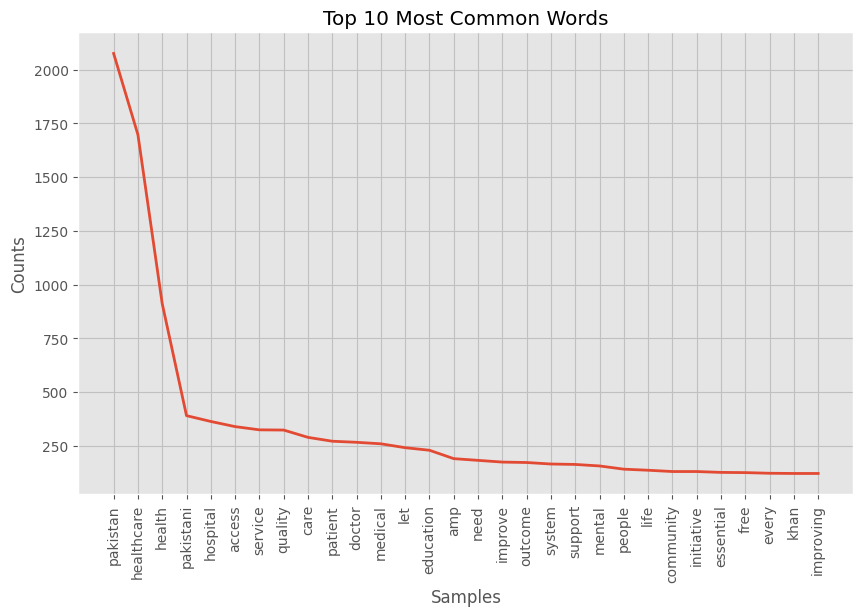

<Axes: title={'center': 'Top 10 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Visualizations
plt.figure(figsize=(10, 6))
fdist.plot(30, title='Top 10 Most Common Words')

### **Word Cloud**

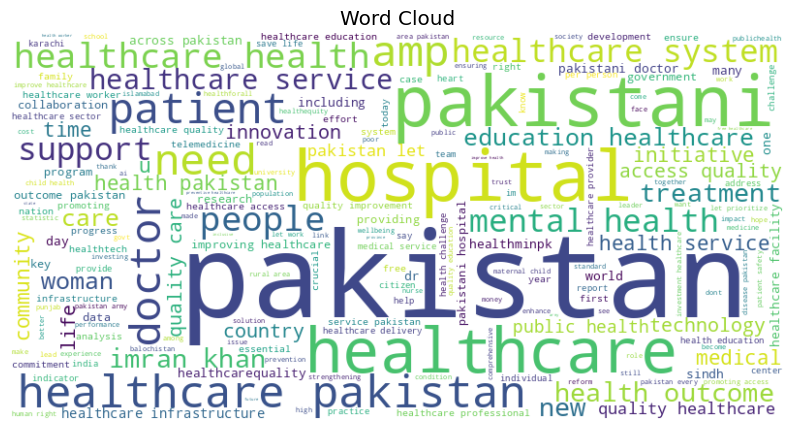

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# **Sentiment Analysis of Healthcare Tweets using Vader Sentiment Analyzer**

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
example = df['text'][18]
print(example)

girl doctor like girl much havent seen yet know pakistani add yoga httpstcoa4ybxjmmc6


In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, text in tqdm(enumerate(df['text']), total=len(df)):
    res[i] = sia.polarity_scores(text)

  0%|          | 0/2503 [00:00<?, ?it/s]

In [ ]:
# Convert polarity scores to DataFrame
vaders = pd.DataFrame(res).T

# Merge polarity scores with original DataFrame
vaders = pd.concat([df, vaders], axis=1)

In [ ]:
# Display the resulting DataFrame
vaders.head()

,text,neg,neu,pos,compound
0,pakistan pmlns leadership cusp new dawn ready ...,0.000,0.848,0.152,0.3612
1,shocking incident happened pims hospital clerk...,0.299,0.701,0.000,-0.8555
2,letter suspension program say program executed...,0.282,0.640,0.078,-0.7906
3,scientist find alzheimers drug make teeth grow...,0.000,1.000,0.000,0.0000
4,thrilled see digitalhealthtechpks new mobile a...,0.000,0.847,0.153,0.4404


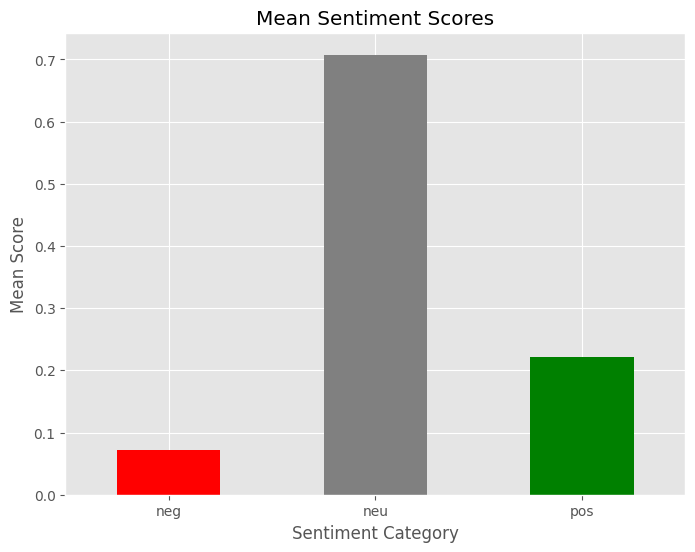

In [ ]:
# Calculate mean sentiment scores
mean_scores = vaders[['neg', 'neu', 'pos']].mean()

# Plot bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Mean Sentiment Scores')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()
df['vader_sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

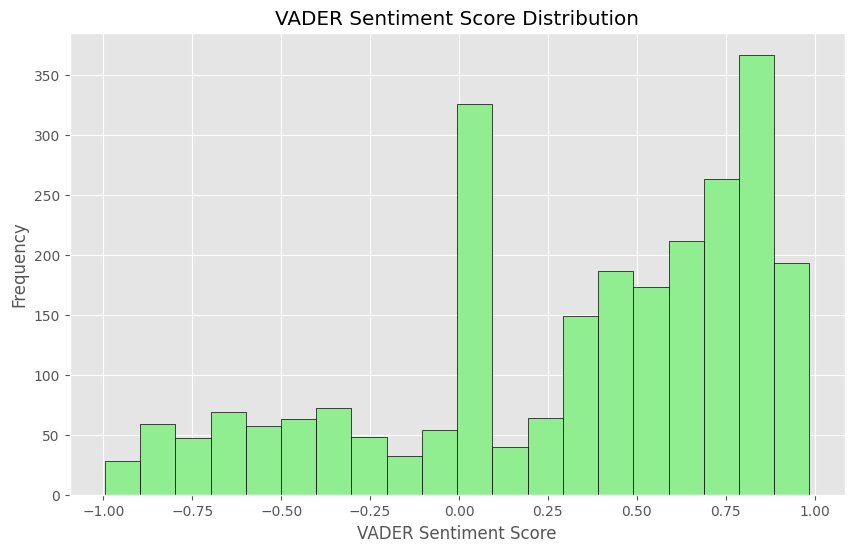

In [ ]:
# Plotting VADER Sentiment Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['vader_sentiment'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')
plt.title('VADER Sentiment Score Distribution')
plt.grid(True)
plt.show()

# **Sentiment Analysis of Healthcare Tweets using TextBlob**

In [ ]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment)

# Analyze sentiment polarity and subjectivity
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['sentiment'].apply(lambda x: x.subjectivity)

# Analyze sentiment (Positive, Negative, Neutral)
def sentiment_label(row):
  if row['polarity'] > 0:
    return 'Positive'
  elif row['polarity'] < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment_label'] = df.apply(sentiment_label, axis=1)

In [ ]:
df.head()

,text,vader_sentiment,sentiment,polarity,subjectivity,sentiment_label
0,pakistan pmlns leadership cusp new dawn ready ...,0.3612,"(0.16818181818181818, 0.4772727272727273)",0.168182,0.477273,Positive
1,shocking incident happened pims hospital clerk...,-0.8555,"(-0.2, 0.33333333333333337)",-0.200000,0.333333,Negative
2,letter suspension program say program executed...,-0.7906,"(0.06666666666666665, 0.48888888888888893)",0.066667,0.488889,Positive
3,scientist find alzheimers drug make teeth grow...,0.0000,"(0.0, 0.0)",0.000000,0.000000,Neutral
4,thrilled see digitalhealthtechpks new mobile a...,0.4404,"(0.36818181818181817, 0.5772727272727273)",0.368182,0.577273,Positive


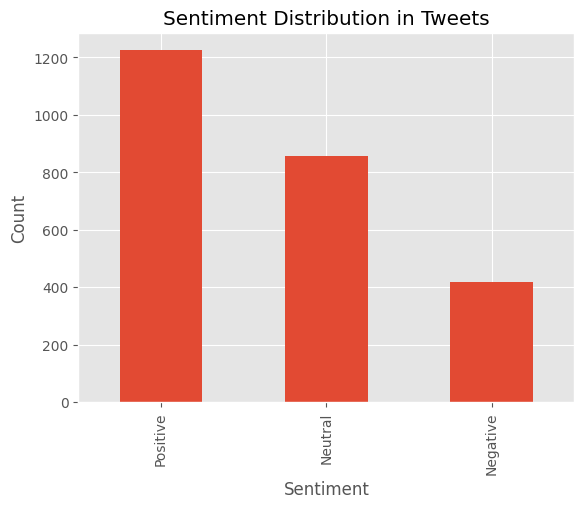

In [ ]:
df['sentiment_label'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Tweets')
plt.show()

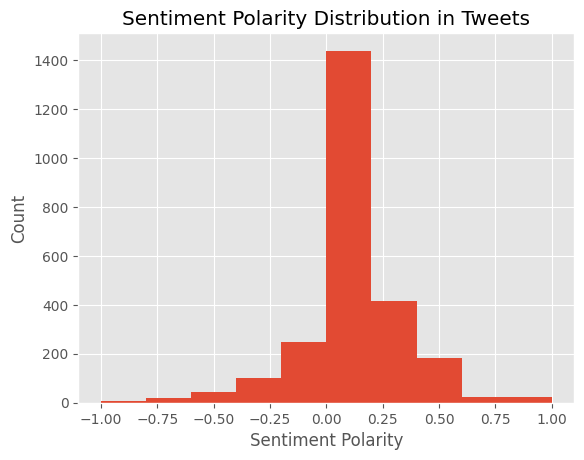

In [ ]:
plt.hist(df['polarity'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution in Tweets')
plt.show()

In [ ]:
# Sentiment Analysis using TextBlob
df['textblob_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,text,vader_sentiment,sentiment,polarity,subjectivity,sentiment_label,textblob_sentiment
0,pakistan pmlns leadership cusp new dawn ready ...,0.3612,"(0.16818181818181818, 0.4772727272727273)",0.168182,0.477273,Positive,0.168182
1,shocking incident happened pims hospital clerk...,-0.8555,"(-0.2, 0.33333333333333337)",-0.200000,0.333333,Negative,-0.200000
2,letter suspension program say program executed...,-0.7906,"(0.06666666666666665, 0.48888888888888893)",0.066667,0.488889,Positive,0.066667
3,scientist find alzheimers drug make teeth grow...,0.0000,"(0.0, 0.0)",0.000000,0.000000,Neutral,0.000000
4,thrilled see digitalhealthtechpks new mobile a...,0.4404,"(0.36818181818181817, 0.5772727272727273)",0.368182,0.577273,Positive,0.368182


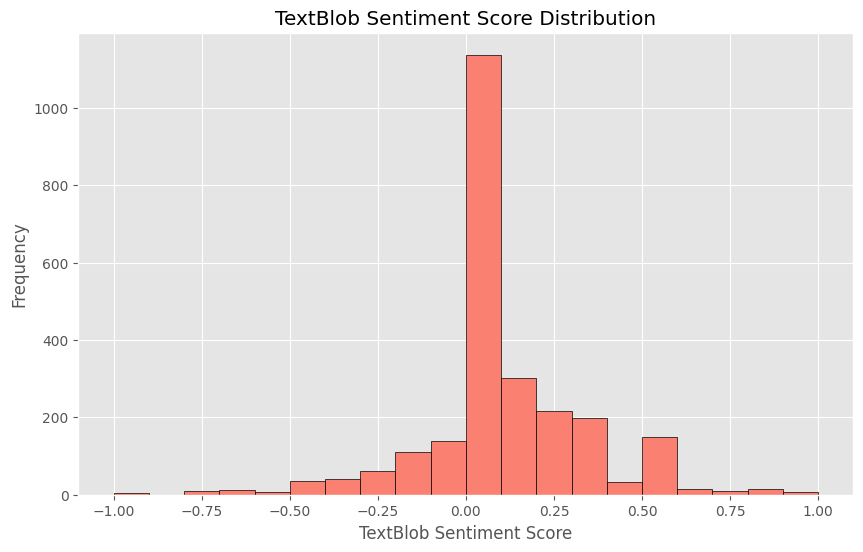

In [ ]:
# Plotting TextBlob Sentiment Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['textblob_sentiment'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('TextBlob Sentiment Score')
plt.ylabel('Frequency')
plt.title('TextBlob Sentiment Score Distribution')
plt.grid(True)
plt.show()

# **NLP Classification with a Pre-trained BERT Model**

In [ ]:
# Load the merged CSV file
df = pd.read_csv('preprocessed_dataset.csv')

# Use a pre-trained BERT model for sequence classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Create a pipeline for sentiment analysis
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Function to classify tweets
def classify_tweet(text):
    result = classifier(text)
    return result[0]['label']

max_seq_length = 512  # Maximum sequence length supported by BERT

# Truncate long sequences
df['text'] = df['text'].apply(lambda x: x[:max_seq_length])

# Apply the classifier to the truncated tweets
df['classification'] = df['text'].apply(classify_tweet)
# # Apply the classifier to the tweets
# df['classification'] = df['text'].apply(classify_tweet)

# Filter tweets classified as 'LABEL_1' (assuming LABEL_1 is the relevant class)
df = df[df['classification'] == 'LABEL_1']

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Save the filtered DataFrame to a CSV file
df.to_csv('classified_tweets.csv', index=False)

# Display the DataFrame
df.head()

,text,classification
0,pakistan pmlns leadership cusp new dawn ready ...,LABEL_1
1,shocking incident happened pims hospital clerk...,LABEL_1
2,letter suspension program say program executed...,LABEL_1
3,scientist find alzheimers drug make teeth grow...,LABEL_1
4,thrilled see digitalhealthtechpks new mobile a...,LABEL_1


<ipython-input-55-4a43d94aa423>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classification', palette='viridis')


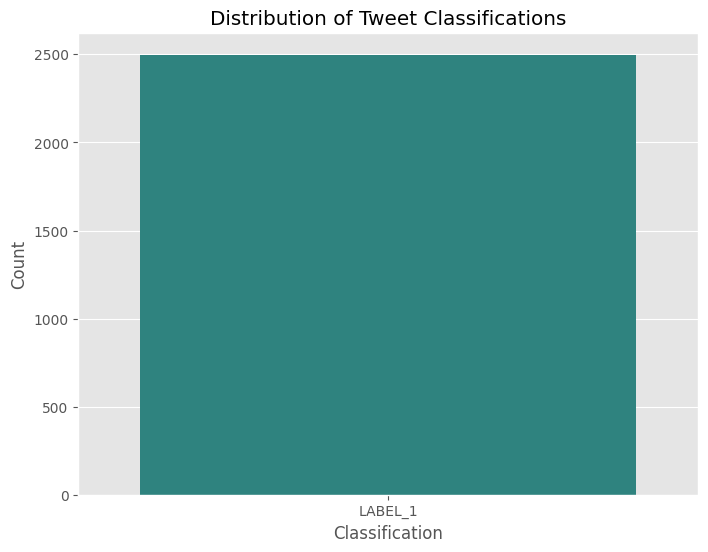

In [ ]:
# Plot the classification results
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='classification', palette='viridis')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Distribution of Tweet Classifications')
plt.show()

# Filter tweets classified as 'LABEL_1' (assuming LABEL_1 is the relevant class)
df_filtered = df[df['classification'] == 'LABEL_1']

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-59-32b87b0b80cc>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classification', palette='viridis')


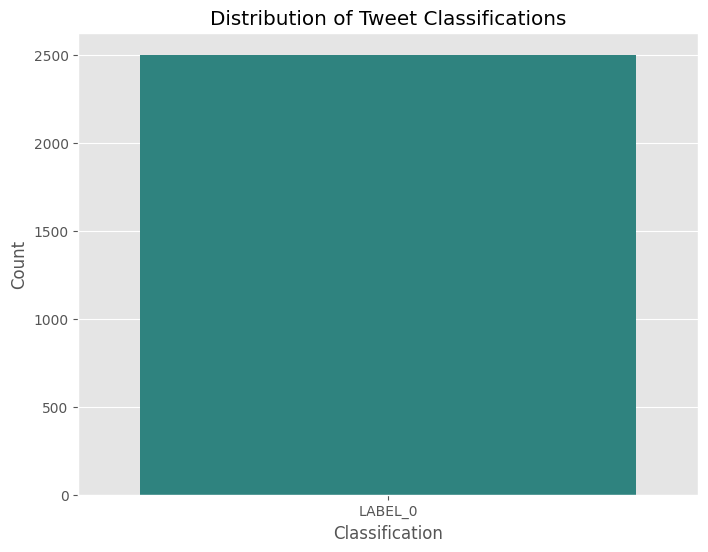

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged CSV file
df = pd.read_csv('preprocessed_dataset.csv')

# Use a pre-trained BERT model for sequence classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Create a pipeline for sentiment analysis
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Function to classify tweets
def classify_tweet(text):
    result = classifier(text)
    return result[0]['label']

max_seq_length = 512  # Maximum sequence length supported by BERT

# Truncate long sequences
df['text'] = df['text'].apply(lambda x: x[:max_seq_length])

# Apply the classifier to the truncated tweets
df['classification'] = df['text'].apply(classify_tweet)

# Plot the classification results for both classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='classification', palette='viridis')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Distribution of Tweet Classifications')
plt.show()

# **Named Entity Recognition (NER)**

In [ ]:
# Load spaCy's pre-trained NER model
nlp = spacy.load('en_core_web_sm')

# Function to extract entities and check for relevant ones
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.label_ for ent in doc.ents]
    return entities

# Apply NER to the tweets
df_filtered['entities'] = df_filtered['text'].apply(extract_entities)

# Define relevant entities (e.g., ORG for organizations, GPE for locations)
relevant_entities = {'ORG', 'GPE', 'PERSON', 'FAC'}

# Function to check if relevant entities are present
def has_relevant_entity(entities):
    return any(ent in relevant_entities for ent in entities)

# Filter tweets containing relevant entities
df_relevant = df_filtered[df_filtered['entities'].apply(has_relevant_entity)]

# Flatten the list of entities for plotting
all_entities = [entity for entities in df_relevant['entities'] for entity in entities]

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
# Save the final filtered DataFrame to a CSV file
df_relevant.to_csv('final_filtered_tweets.csv', index=False)

# Display the DataFrame
df_relevant.head()

,text,classification,entities
0,pakistan pmlns leadership cusp new dawn ready ...,LABEL_1,[GPE]
1,shocking incident happened pims hospital clerk...,LABEL_1,[ORG]
2,letter suspension program say program executed...,LABEL_1,"[GPE, DATE]"
4,thrilled see digitalhealthtechpks new mobile a...,LABEL_1,[GPE]
5,imran khan allowed mdical test indpendant hosp...,LABEL_1,"[PERSON, PERSON, PERSON, ORG]"


<ipython-input-58-0e0f520f8b05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_entities, palette='viridis', order=pd.Series(all_entities).value_counts().index)


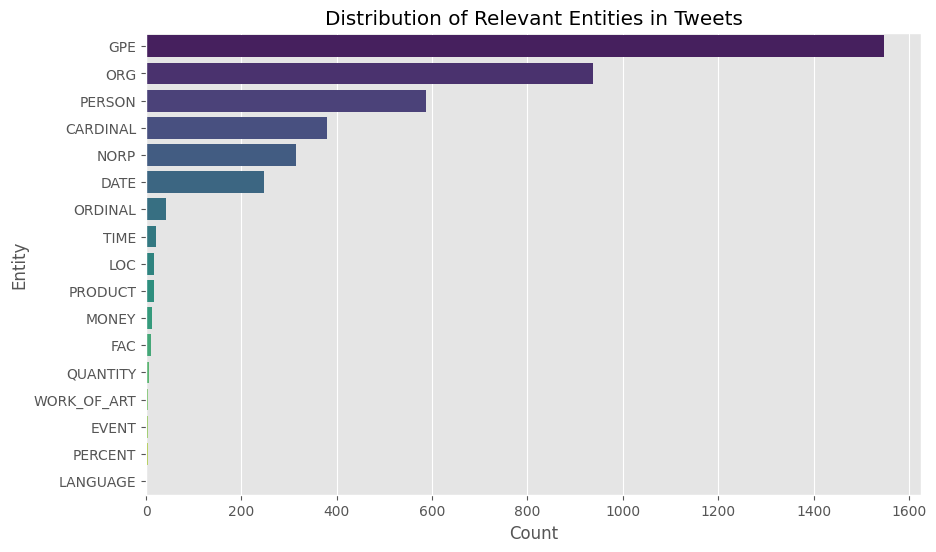

In [ ]:
# Plot the distribution of relevant entities
plt.figure(figsize=(10, 6))
sns.countplot(y=all_entities, palette='viridis', order=pd.Series(all_entities).value_counts().index)
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Relevant Entities in Tweets')
plt.show()

# **Topic Modeling Analysis of Healthcare Tweets**

In [ ]:
# Load the dataset
df = pd.read_csv('preprocessed_dataset.csv')

## **Tokenization**

In [ ]:
# Tokenize and preprocess the text
stop_words = set(stopwords.words('english'))  # Assuming English stopwords
tokenized_text = df['text'].apply(lambda x: [word for word in word_tokenize(str(x)) if word.lower() not in stop_words and word.isalpha()])

## **Dictionary represenatation**

In [ ]:
# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_text)

## **Filtering tokens**

In [ ]:
# Filter out tokens that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

## **Documents to bag-of-words corpus**

In [ ]:
# Convert the documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

## **LDA Model**

In [ ]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Print the topics and their top words
for topic_num, words in lda_model.print_topics():
    print(f"Topic #{topic_num + 1}: {words}")

Topic #1: 0.039*"pakistani" + 0.035*"doctor" + 0.032*"hospital" + 0.016*"amp" + 0.012*"u" + 0.009*"people" + 0.007*"new" + 0.007*"r" + 0.007*"khan" + 0.007*"punjab"
Topic #2: 0.038*"patient" + 0.037*"quality" + 0.024*"care" + 0.018*"pakistani" + 0.016*"improvement" + 0.015*"healthcarequality" + 0.015*"hospital" + 0.013*"safety" + 0.011*"need" + 0.011*"health"
Topic #3: 0.066*"health" + 0.026*"access" + 0.020*"service" + 0.020*"let" + 0.017*"mental" + 0.016*"care" + 0.012*"essential" + 0.012*"outcome" + 0.012*"improve" + 0.011*"wellbeing"
Topic #4: 0.022*"free" + 0.021*"service" + 0.020*"medical" + 0.015*"health" + 0.012*"patient" + 0.011*"sindh" + 0.011*"dedication" + 0.010*"providing" + 0.010*"amp" + 0.010*"country"
Topic #5: 0.030*"health" + 0.029*"education" + 0.020*"innovation" + 0.015*"technology" + 0.015*"let" + 0.014*"infrastructure" + 0.013*"initiative" + 0.013*"research" + 0.013*"future" + 0.013*"access"


## **Topic Modeling Results**
### Topic #1:
- Keywords: pakistani, hospital, army, healthcare, khan, imran, doctor, people, free, sindh
- Interpretation: This topic seems to focus on various aspects related to healthcare and medical services in Pakistan. It includes keywords like "pakistani" and "hospital," indicating discussions about healthcare facilities in Pakistan. The presence of "army" suggests discussions related to healthcare services provided by the military. Additionally, names like "khan" and "imran" might refer to specific individuals or organizations involved in healthcare initiatives. The inclusion of "doctor" and "free" suggests discussions about medical practitioners and possibly free healthcare services. "Sindh" could indicate discussions specific to the healthcare situation in the Sindh province.

### Topic #2:
- Keywords: doctor, healthcare, medical, service, health, pakistani, amp, hospital, free, people
- Interpretation: This topic appears to focus on medical services and healthcare professionals. Keywords like "doctor," "medical," and "healthcare" indicate discussions about medical practitioners and healthcare services. The presence of "service" suggests discussions related to healthcare service delivery. Additionally, "health" and "people" might indicate discussions about general health issues and public health concerns in Pakistan.

### Topic #3:
- Keywords: hospital, health, pakistani, healthcare, doctor, amp, khan, transplant, medical, imran
- Interpretation: This topic revolves around hospitals and healthcare services in Pakistan. Keywords like "hospital," "healthcare," and "doctor" indicate discussions about healthcare facilities and medical practitioners. The presence of "transplant" suggests discussions related to organ transplantation services. Names like "khan" and "imran" might refer to individuals or organizations associated with healthcare initiatives in Pakistan.

### Topic #4:
- Keywords: health, pakistani, dr, amp, mental, doctor, woman, president, people, free
- Interpretation: This topic focuses on various health-related issues in Pakistan. Keywords like "health," "mental," and "doctor" indicate discussions about mental health and healthcare professionals. The presence of "pakistani" suggests discussions about health issues specific to Pakistan. Additionally, terms like "woman," "president," and "free" might indicate discussions about healthcare policies, women's health, and possibly free healthcare services.

### Topic #5:
- Keywords: healthcare, health, service, medical, doctor, education, hospital, pakistani, access, people
- Interpretation: This topic seems to cover a broad range of healthcare-related topics. Keywords like "healthcare," "health," and "medical" indicate discussions about healthcare services and general health issues. The presence of "doctor" suggests discussions about medical practitioners. Additionally, terms like "education," "hospital," and "access" might indicate discussions about healthcare education, hospital services, and access to healthcare in Pakistan.

In [ ]:
# Get the dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    dominant_topic = []
    for doc in corpus:
        topic_distribution = lda_model.get_document_topics(doc)
        dominant_topic.append(max(topic_distribution, key=lambda x: x[1])[0])
    return dominant_topic

df['Dominant Topic'] = get_dominant_topic(lda_model, corpus)
df[['text', 'Dominant Topic']].head(21)

,text,Dominant Topic
0,pakistan pmlns leadership cusp new dawn ready ...,4
1,shocking incident happened pims hospital clerk...,3
2,letter suspension program say program executed...,0
3,scientist find alzheimers drug make teeth grow...,0
4,thrilled see digitalhealthtechpks new mobile a...,4
5,imran khan allowed mdical test indpendant hosp...,0
6,appalled lack respect patient privacy confiden...,1
7,im inspired resilience pakistani woman work ti...,2
8,angry prevalence quackery unregulated medical ...,1
9,im proud support organization working combat i...,2


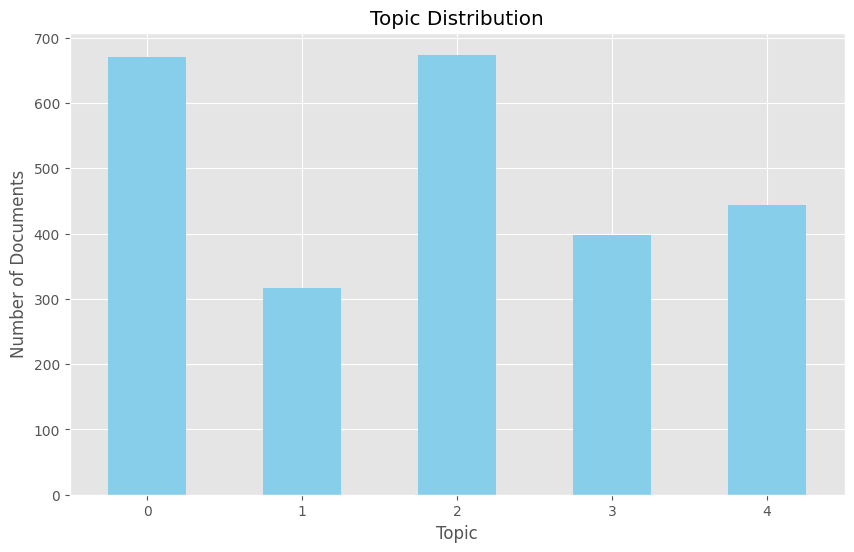

In [ ]:
# Get the count of documents for each dominant topic
topic_counts = df['Dominant Topic'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=0)
plt.show()

# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

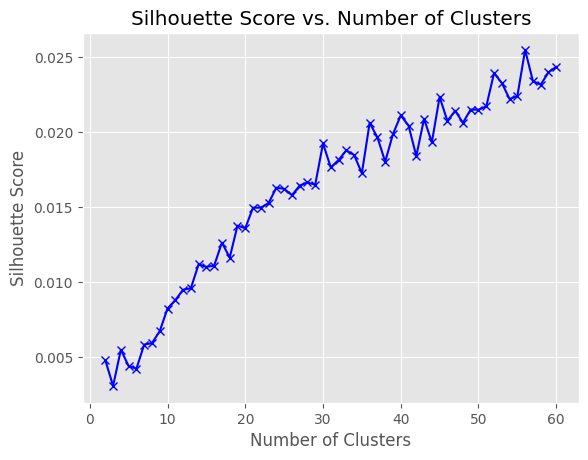

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("tweets.csv")

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Apply preprocessing and tokenization
data['processed_text'] = data['text'].apply(preprocess_text)
data['tokens'] = data['processed_text'].apply(tokenize_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X = vectorizer.fit_transform(data['tokens'])

# Define the range of clusters to try
k_values = range(2, 61)
silhouette_scores = []

# Iterate through different numbers of clusters
for k in k_values:
    # Cluster the data
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

**Calculate Silhouette Score: For each clustering result, calculate the silhouette score using silhouette_score from sklearn.metrics. The silhouette score measures the quality of the clustering.**

A good **silhouette score** typically falls within the range of -1 to 1. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

* A score close to 1 indicates that the object is well-clustered and lies far
away from neighboring clusters.
* A score around 0 indicates overlapping clusters, where the distance between clusters is not significantly larger than the distance within clusters.
* A negative score suggests that the object may have been assigned to the wrong cluster.

In general:
* If the silhouette score is close to 1, it indicates that the clustering configuration is appropriate.
* If the silhouette score is close to 0 or negative, it suggests that the clustering configuration may not be optimal.

However, the interpretation of silhouette scores can vary depending on the context and the nature of the data. It's essential to consider other factors such as domain knowledge, the specific problem you're trying to solve, and the characteristics of your data when interpreting silhouette scores. Additionally, it's often useful to compare silhouette scores across different clustering configurations to choose the best one for your data.

# **Exploring N-grams: Visualizing Textual Patterns with Word Clouds**

## **Generate 2-grams**

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Function to generate N-grams for a given text
def generate_ngrams(text, n):
    words = text.split()
    ngrams_list = list(ngrams(words, n))
    return [' '.join(gram) for gram in ngrams_list]

# Generate N-grams for the text in the DataFrame
n = 2  # You can adjust the value of 'n' for different N-grams
df['ngrams'] = df['text'].apply(lambda x: generate_ngrams(x, n))

# Flatten the list of N-grams for analysis
all_ngrams = [ngram for ngram_list in df['ngrams'] for ngram in ngram_list]

# Count the occurrences of each N-gram
ngram_counts = Counter(all_ngrams)

# Get the top N most common N-grams and their counts
top_ngrams = ngram_counts.most_common(10)
top_ngram_labels, top_ngram_counts = zip(*top_ngrams)

### **Plotting the Top 10 Most Common 2-grams**

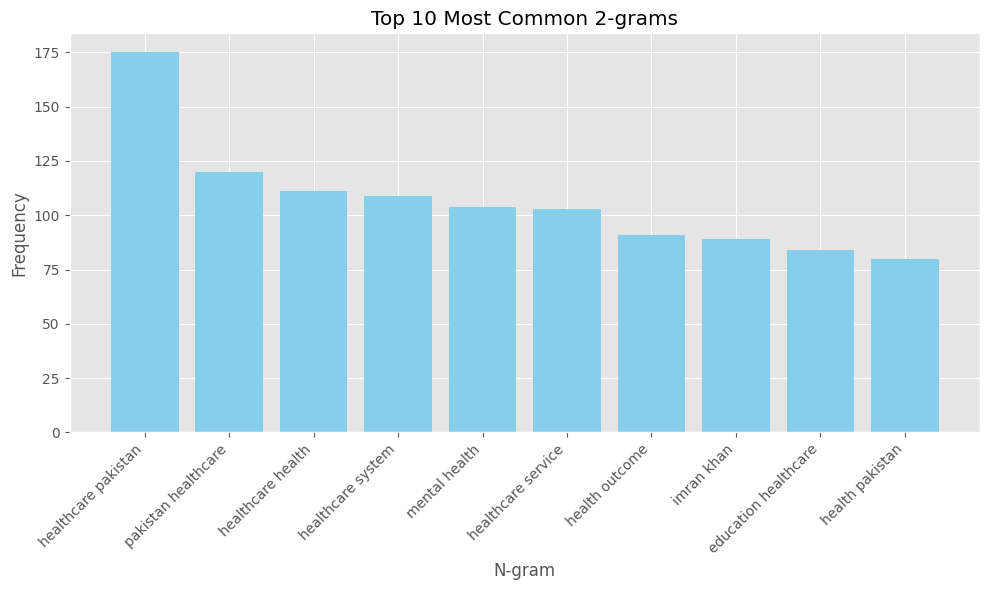

In [ ]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ngram_labels, top_ngram_counts, color='skyblue')
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title(f'Top 10 Most Common {n}-grams')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### **Visualizing N-gram (n = 2) Frequencies with Word Clouds**

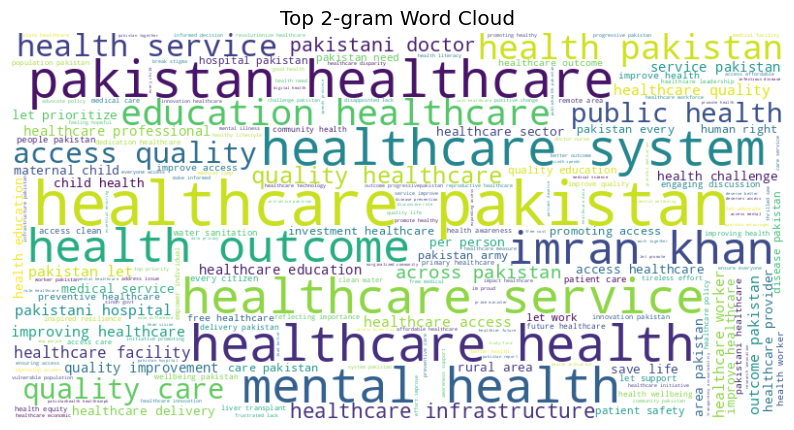

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Function to generate N-grams for a given text
def generate_ngrams(text, n):
    words = text.split()
    ngrams_list = list(ngrams(words, n))
    return [' '.join(gram) for gram in ngrams_list]

# Generate N-grams for the text in the DataFrame
n = 2  # You can adjust the value of 'n' for different N-grams
df['ngrams'] = df['text'].apply(lambda x: generate_ngrams(x, n))

# Flatten the list of N-grams for analysis
all_ngrams = [ngram for ngram_list in df['ngrams'] for ngram in ngram_list]

# Count the occurrences of each N-gram
ngram_counts = Counter(all_ngrams)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title(f'Top {n}-gram Word Cloud')
plt.show()

## **Generate 3-grams**

In [ ]:
# Function to generate N-grams for a given text
def generate_ngrams(text, n):
    words = text.split()
    ngrams_list = list(ngrams(words, n))
    return [' '.join(gram) for gram in ngrams_list]

# Generate N-grams for the text in the DataFrame
n = 3  # You can adjust the value of 'n' for different N-grams
df['ngrams'] = df['text'].apply(lambda x: generate_ngrams(x, n))

# Flatten the list of N-grams for analysis
all_ngrams = [ngram for ngram_list in df['ngrams'] for ngram in ngram_list]

# Count the occurrences of each N-gram
ngram_counts = Counter(all_ngrams)

# Get the top N most common N-grams and their counts
top_ngrams = ngram_counts.most_common(10)
top_ngram_labels, top_ngram_counts = zip(*top_ngrams)

### **Plotting the Top 10 Most Common 3-grams**

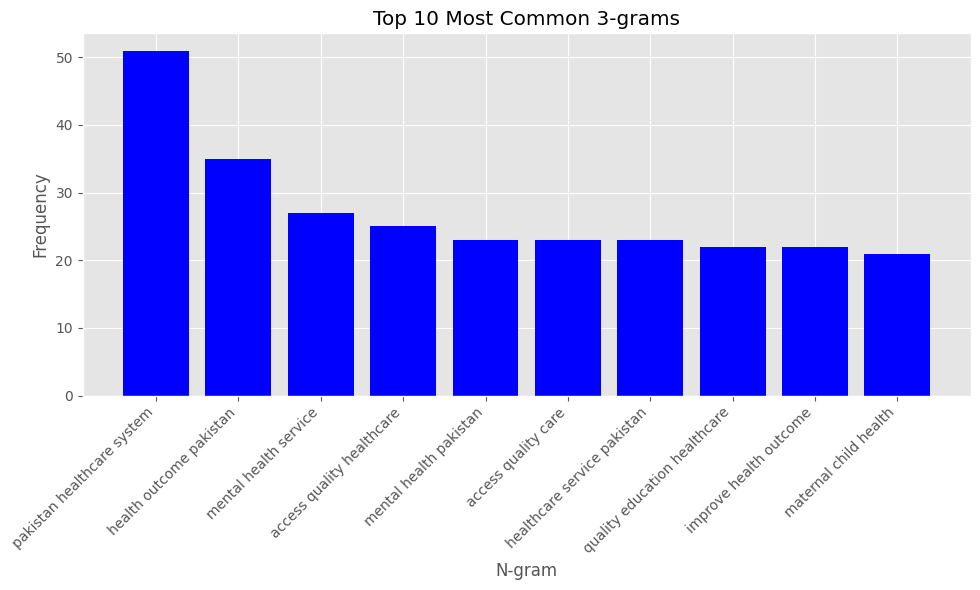

In [ ]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ngram_labels, top_ngram_counts, color='blue')
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title(f'Top 10 Most Common {n}-grams')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### **Visualizing N-gram (n = 3) Frequencies with Word Clouds**

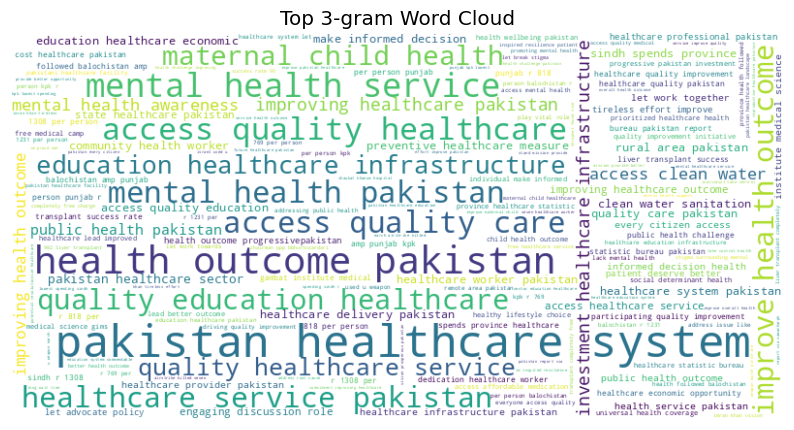

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Function to generate N-grams for a given text
def generate_ngrams(text, n):
    words = text.split()
    ngrams_list = list(ngrams(words, n))
    return [' '.join(gram) for gram in ngrams_list]

# Generate N-grams for the text in the DataFrame
n = 3  # You can adjust the value of 'n' for different N-grams
df['ngrams'] = df['text'].apply(lambda x: generate_ngrams(x, n))

# Flatten the list of N-grams for analysis
all_ngrams = [ngram for ngram_list in df['ngrams'] for ngram in ngram_list]

# Count the occurrences of each N-gram
ngram_counts = Counter(all_ngrams)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title(f'Top {n}-gram Word Cloud')
plt.show()

# **Sentiment analysis on tweets using a pre-trained RoBERTa model**

In [ ]:
pip install pandas transformers seaborn matplotlib

In [ ]:
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification, pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Load a pre-trained RoBERTa model and tokenizer for sentiment analysis
tokenizer = RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = RobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Create a pipeline for sentiment analysis
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Function to classify the sentiment of tweets
def classify_sentiment(text):
    result = sentiment_analyzer(text)
    return result[0]['label']

max_seq_length = 512  # Maximum sequence length supported by RoBERTa

# Truncate long sequences
df['text'] = df['text'].apply(lambda x: x[:max_seq_length] if isinstance(x, str) else x)

# Apply the sentiment classifier to the truncated tweets
df['sentiment'] = df['text'].apply(classify_sentiment)

# Save the results to a new CSV file (optional)
df.to_csv('tweets_with_sentiment.csv', index=False)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
data = pd.read_csv("tweets_with_sentiment.csv")

In [ ]:
data.head()

,text,sentiment
0,proud moment division forensic psychiatry cpdf...,LABEL_2
1,lawlessness fascism pakistan limit despite cou...,LABEL_0
2,empathy compassion essential quality healthcar...,LABEL_2
3,dr henry heimlich inventor antichoking heimlic...,LABEL_1
4,inspired dedication healthcare professional wo...,LABEL_1


In [ ]:
import pandas as pd

# Load the DataFrame
data = pd.read_csv("tweets_with_sentiment.csv")

# Ensure 'sentiment' column is string type for consistency
data['sentiment'] = data['sentiment'].astype(str)

# Count occurrences of each sentiment class
class_counts = data['sentiment'].value_counts()

# Display sentiment labels and their counts
print("\nSentiment Labels and Counts:")
for sentiment, count in class_counts.items():
    print(f"{sentiment}: {count}")


Sentiment Labels and Counts:
LABEL_1: 1248
LABEL_2: 808
LABEL_0: 447


In [ ]:
import pandas as pd

# Load the DataFrame
data = pd.read_csv("tweets_with_sentiment.csv")

# Ensure 'sentiment' column is string type for consistency
data['sentiment'] = data['sentiment'].astype(str)

# Mapping dictionary for sentiment labels
label_mapping = {
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive',
    'LABEL_0': 'Negative'
}

# Replace labels with human-readable names
data['sentiment'] = data['sentiment'].replace(label_mapping)

# Count occurrences of each sentiment class
class_counts = data['sentiment'].value_counts()

# Display sentiment labels and their counts
print("\nSentiment Labels and Counts:")
for sentiment, count in class_counts.items():
    print(f"{sentiment}: {count}")


Sentiment Labels and Counts:
Neutral: 1248
Positive: 808
Negative: 447


<ipython-input-36-740715c88075>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


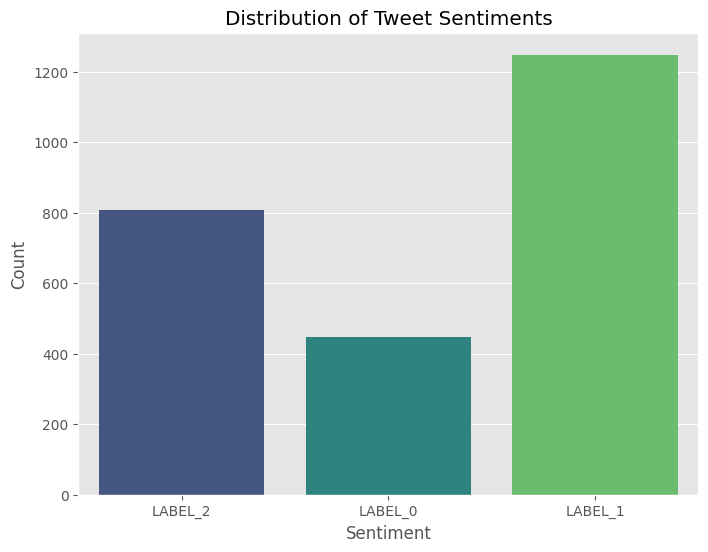

In [ ]:
# Plot the sentiment classification results
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Tweet Sentiments')
plt.show()

**LABEL 1** = Neutral

**LABEL 2** = Positive

**LABEL 0** = Negative

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load your dataset
data = pd.read_csv('tweets_with_sentiment.csv')

In [ ]:
data.head()

,text,sentiment
0,proud moment division forensic psychiatry cpdf...,LABEL_2
1,lawlessness fascism pakistan limit despite cou...,LABEL_0
2,empathy compassion essential quality healthcar...,LABEL_2
3,dr henry heimlich inventor antichoking heimlic...,LABEL_1
4,inspired dedication healthcare professional wo...,LABEL_1


In [ ]:
# Preprocess text data (example using TF-IDF Vectorizer)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['text'])

In [ ]:
# Target labels
y = data['sentiment']

In [ ]:
# Example data before balancing
classes_before = y.value_counts().index.tolist()
counts_before = y.value_counts().values.tolist()

# Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Example data after balancing
classes_after = pd.Series(y_resampled).value_counts().index.tolist()
counts_after = pd.Series(y_resampled).value_counts().values.tolist()

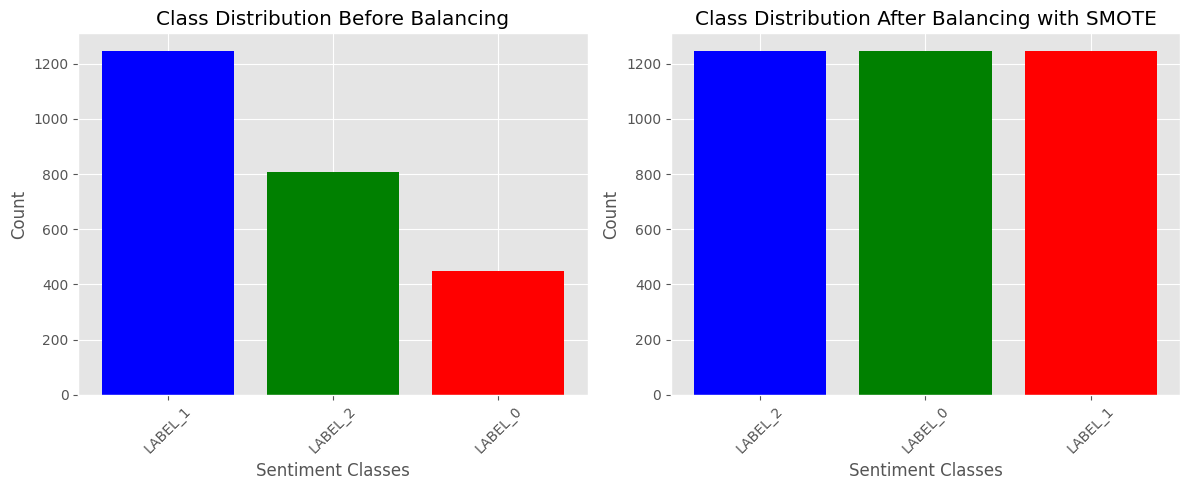

In [ ]:
# Plotting before balancing
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(classes_before, counts_before, color=['blue', 'green', 'red'])
plt.title('Class Distribution Before Balancing')
plt.xlabel('Sentiment Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plotting after balancing
plt.subplot(1, 2, 2)
plt.bar(classes_after, counts_after, color=['blue', 'green', 'red'])
plt.title('Class Distribution After Balancing with SMOTE')
plt.xlabel('Sentiment Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train SVM classifier on the balanced training data
svm_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     LABEL_0       0.82      0.91      0.86       231
     LABEL_1       0.79      0.70      0.74       264
     LABEL_2       0.88      0.89      0.88       254

    accuracy                           0.83       749
   macro avg       0.83      0.83      0.83       749
weighted avg       0.83      0.83      0.83       749



In [ ]:
# Optionally, print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.829105473965287


In [ ]:
# Example predictions on new data (replace with your new data)
new_data = ["This product is amazing!", "I'm disappointed with the service.", "Neutral comment."]

# Preprocess new data
X_new = tfidf_vectorizer.transform(new_data)

# Predict sentiment labels for new data
y_pred_new = svm_classifier.predict(X_new)

# Print predictions
print("\nPredictions on New Data:")
for text, pred in zip(new_data, y_pred_new):
    print(f"Text: '{text}' \nPredicted Sentiment: '{pred}'")


Predictions on New Data:
Text: 'This product is amazing!' 
Predicted Sentiment: 'LABEL_1'
Text: 'I'm disappointed with the service.' 
Predicted Sentiment: 'LABEL_0'
Text: 'Neutral comment.' 
Predicted Sentiment: 'LABEL_1'


In [ ]:
# Sample new data related to healthcare in Pakistan
new_data = [
    "The healthcare reforms in Pakistan are improving access to medical services.",
    "Healthcare workers in Pakistan are facing challenges due to the COVID-19 pandemic.",
    "Efforts are needed to enhance healthcare infrastructure in rural areas of Pakistan."
]

# Preprocess new data with TF-IDF vectorizer
X_new = tfidf_vectorizer.transform(new_data)

# Predict sentiment labels for new data
y_pred_new = svm_classifier.predict(X_new)

# Print predictions
print("\nPredictions on New Data")
for text, pred in zip(new_data, y_pred_new):
    print(f"Text: '{text}' \nPredicted Sentiment: '{pred}'")


Predictions on New Data
Text: 'The healthcare reforms in Pakistan are improving access to medical services.' 
Predicted Sentiment: 'LABEL_2'
Text: 'Healthcare workers in Pakistan are facing challenges due to the COVID-19 pandemic.' 
Predicted Sentiment: 'LABEL_0'
Text: 'Efforts are needed to enhance healthcare infrastructure in rural areas of Pakistan.' 
Predicted Sentiment: 'LABEL_0'


**LABEL 1** = Neutral

**LABEL 2** = Positive

**LABEL 0** = Negative

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest classifier on the balanced training data
rf_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate performance
print("\nRandom Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

     LABEL_0       0.86      0.92      0.89       231
     LABEL_1       0.82      0.76      0.79       264
     LABEL_2       0.88      0.88      0.88       254

    accuracy                           0.85       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.85      0.85      0.85       749



In [ ]:
# Optionally, print accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8504672897196262


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('tweets_with_sentiment.csv')

# Preprocess text data (example using TF-IDF Vectorizer)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['text'])

# Target labels
y = data['sentiment']

# Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Multinomial Naive Bayes': MultinomialNB()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Print confusion matrix
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.title(f'Confusion Matrix - {clf_name}')
    # plt.show()

    # Print classification report
    print(f"\nClassification Report on Test Set - {clf_name}:")
    print(classification_report(y_test, y_pred))

    # Print accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")



Classification Report on Test Set - Logistic Regression:
              precision    recall  f1-score   support

     LABEL_0       0.81      0.92      0.86       231
     LABEL_1       0.80      0.69      0.74       264
     LABEL_2       0.86      0.88      0.87       254

    accuracy                           0.83       749
   macro avg       0.83      0.83      0.83       749
weighted avg       0.83      0.83      0.82       749

Accuracy: 0.8264352469959947


Classification Report on Test Set - Random Forest:
              precision    recall  f1-score   support

     LABEL_0       0.86      0.92      0.89       231
     LABEL_1       0.82      0.76      0.79       264
     LABEL_2       0.88      0.88      0.88       254

    accuracy                           0.85       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.85      0.85      0.85       749

Accuracy: 0.8504672897196262


Classification Report on Test Set - Gradient Boosting:
            